1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the algorithm works on unlabeled data — meaning the system does not have predefined outputs. The goal is to discover hidden patterns, groups, or structures within the dataset. Common tasks include clustering (e.g., K-Means, DBSCAN, Hierarchical Clustering) and dimensionality reduction (e.g., PCA).

2. How does K-Means clustering algorithm work?

Choose the number of clusters
𝑘
k.

Randomly initialize
𝑘
k centroids.

Assign each data point to the nearest centroid (cluster assignment).

Update centroids by taking the mean of all points in each cluster.

Repeat assignment and update steps until centroids stabilize or max iterations reached.
K-Means minimizes intra-cluster variance (inertia).

3. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like diagram that shows how clusters are merged (agglomerative) or split (divisive) at each step of hierarchical clustering. The vertical axis represents the distance or dissimilarity at which clusters are joined. Cutting the dendrogram at a chosen height defines the final clusters.

4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means: Requires predefining the number of clusters (
𝑘
k), iterative centroid updates, efficient for large datasets.

Hierarchical clustering: Builds a tree of clusters (dendrogram), no need to specify
𝑘
k upfront, but computationally expensive for large datasets.

5. What are the advantages of DBSCAN over K-Means?

Does not require the number of clusters
𝑘
k beforehand.

Can find arbitrarily shaped clusters.

Can handle clusters of varying densities.

Identifies noise/outliers explicitly.
K-Means struggles with irregular shapes and noise.

6. When would you use Silhouette Score in clustering?

The Silhouette Score is used to evaluate clustering quality by measuring how similar a point is to its own cluster compared to other clusters. It is useful when comparing different clustering results or selecting the number of clusters. Range: -1 (wrong clustering) to +1 (well-clustered).

7. What are the limitations of Hierarchical Clustering?

Computationally expensive (
𝑂
(
𝑛
2
)
O(n
2
) or worse).

Sensitive to noise and outliers.

Once a merge/split is made, it cannot be undone.

Difficult to scale to very large datasets.

8. Why is feature scaling important in clustering algorithms like K-Means?

K-Means uses Euclidean distance to assign points to clusters. If features are on different scales (e.g., age in years vs. income in dollars), larger-scale features dominate distance calculation. Scaling (standardization/normalization) ensures each feature contributes equally.

9. How does DBSCAN identify noise points?

DBSCAN defines core points (points with ≥ minPts neighbors within radius eps).

Points reachable from core points are cluster members.

Points not reachable from any core point are labeled as noise/outliers.

10. Define inertia in the context of K-Means.

Inertia is the sum of squared distances of each data point to its assigned cluster centroid. It measures cluster compactness. Lower inertia indicates tighter, better-formed clusters.

11. What is the elbow method in K-Means clustering?

The elbow method helps select the optimal number of clusters
𝑘
k. Plot
𝑘
k vs. inertia. At first, inertia decreases sharply, but beyond a certain
𝑘
k, the reduction slows, forming an “elbow.” This point is the best tradeoff between compactness and simplicity.

12. Describe the concept of "density" in DBSCAN.

In DBSCAN, density means how many points are packed within a neighborhood of radius eps.

A point is dense (core) if it has at least minPts neighbors in its eps radius.

Clusters are formed from dense regions connected together.

13. Can hierarchical clustering be used on categorical data?

Yes, but distance metrics must be adapted (e.g., Hamming distance, Jaccard similarity). Standard Euclidean-based hierarchical clustering is not suitable for pure categorical data without transformation.

14. What does a negative Silhouette Score indicate?

A negative Silhouette Score means a sample is closer (on average) to points in another cluster than to points in its own cluster. This suggests misclassification or overlapping clusters.

15. Explain the term "linkage criteria" in hierarchical clustering.

Linkage defines how distances between clusters are calculated:

Single linkage: Minimum distance between points of two clusters.

Complete linkage: Maximum distance between points.

Average linkage: Average distance between all pairs.

Ward’s method: Minimizes variance within clusters.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Because K-Means assumes clusters are spherical, equally sized, and similar density. If clusters vary greatly in size, shape, or density, K-Means misassigns points, splitting large clusters or merging small ones incorrectly.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

eps: Neighborhood radius. Larger values → bigger, fewer clusters; too small → many tiny clusters or noise.

minPts: Minimum points required to form a dense region. Larger values → stricter core definition; too small → may merge noise into clusters.
Together, they control density sensitivity.

18. How does K-Means++ improve upon standard K-Means initialization?

Instead of random initialization, K-Means++ spreads out initial centroids:

First centroid is chosen randomly.

Subsequent centroids chosen with probability proportional to squared distance from nearest existing centroid.
This reduces chances of poor local minima and speeds convergence.

19. What is agglomerative clustering?

It is a bottom-up hierarchical clustering method:

Each data point starts as its own cluster.

Iteratively, the two closest clusters are merged.

Continues until one cluster remains or stopping condition is reached.
The process is visualized with a dendrogram.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia only measures compactness (within-cluster distance). It always decreases with more clusters, so cannot indicate optimal
𝑘
k.

Silhouette Score balances compactness and separation (distance between clusters).

Range (-1 to +1) provides interpretable quality: higher = better clustering.
Thus, Silhouette is more reliable for comparing different cluster numbers.

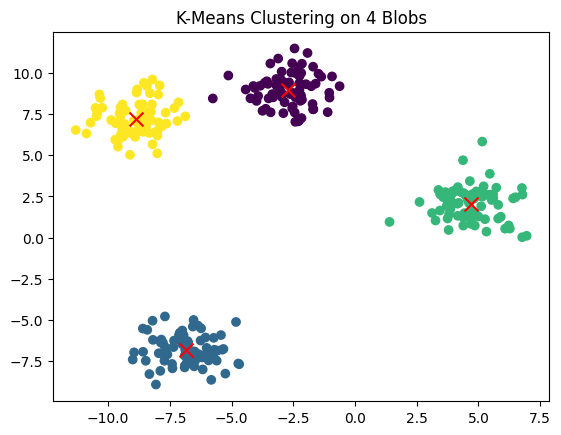

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.title("K-Means Clustering on 4 Blobs")
plt.show()


In [2]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X_iris = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_iris)
print("First 10 predicted labels:", labels_agg[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


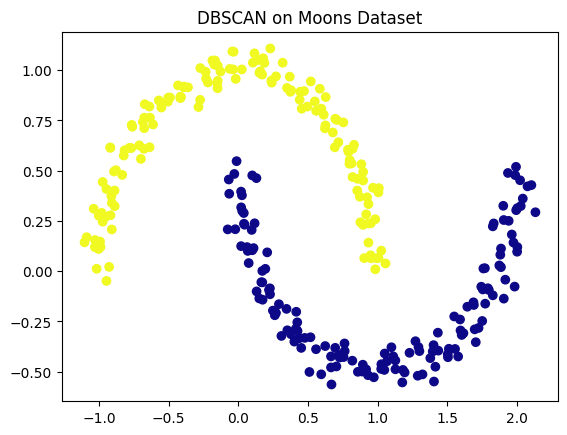

In [3]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_db = dbscan.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=labels_db, cmap='plasma')
plt.title("DBSCAN on Moons Dataset")
plt.show()


In [4]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X_wine = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

kmeans_wine = KMeans(n_clusters=3, random_state=42)
labels_wine = kmeans_wine.fit_predict(X_scaled)
unique, counts = np.unique(labels_wine, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


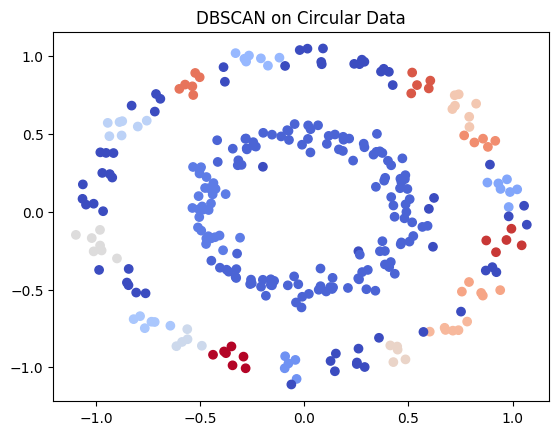

In [5]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
dbscan_circles = DBSCAN(eps=0.1, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X_circles)

plt.scatter(X_circles[:,0], X_circles[:,1], c=labels_circles, cmap='coolwarm')
plt.title("DBSCAN on Circular Data")
plt.show()


In [6]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

cancer = load_breast_cancer()
X_cancer = cancer.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cancer)

kmeans_cancer = KMeans(n_clusters=2, random_state=42)
kmeans_cancer.fit(X_scaled)
print("Cluster centroids:\n", kmeans_cancer.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


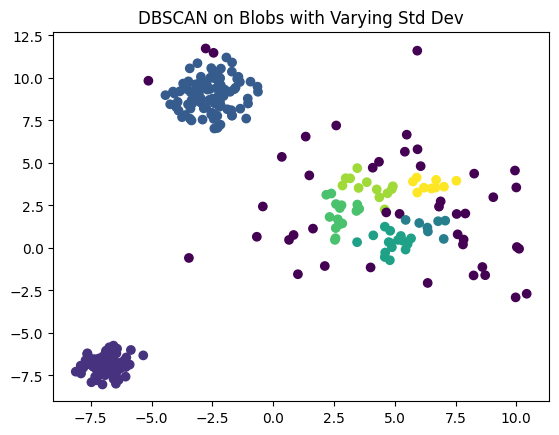

In [7]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_varied, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan_var = DBSCAN(eps=0.8, min_samples=5)
labels_var = dbscan_var.fit_predict(X_varied)

plt.scatter(X_varied[:,0], X_varied[:,1], c=labels_var, cmap='viridis')
plt.title("DBSCAN on Blobs with Varying Std Dev")
plt.show()


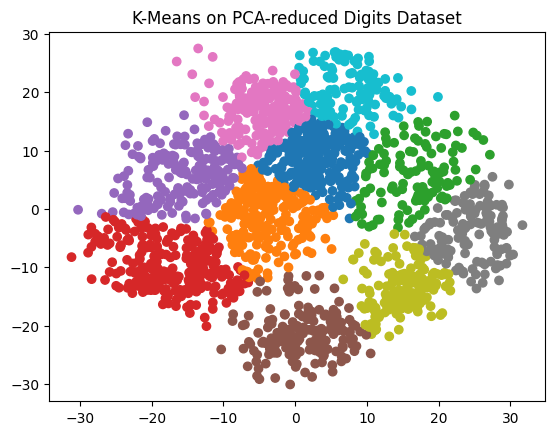

In [8]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X_digits = digits.data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

kmeans_digits = KMeans(n_clusters=10, random_state=42)
labels_digits = kmeans_digits.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_digits, cmap='tab10')
plt.title("K-Means on PCA-reduced Digits Dataset")
plt.show()


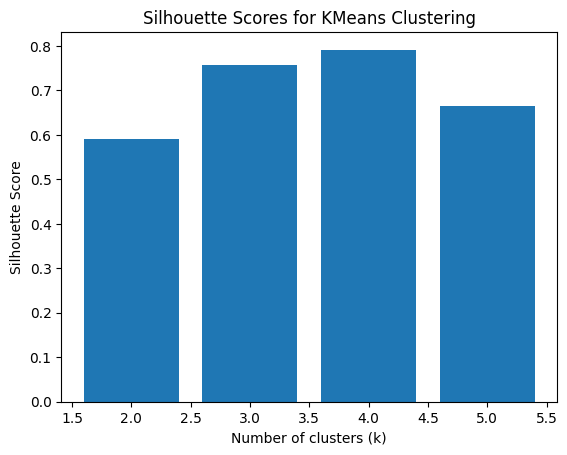

In [9]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_sil, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sil)
    score = silhouette_score(X_sil, labels)
    scores.append(score)

plt.bar(range(2,6), scores)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans Clustering")
plt.show()


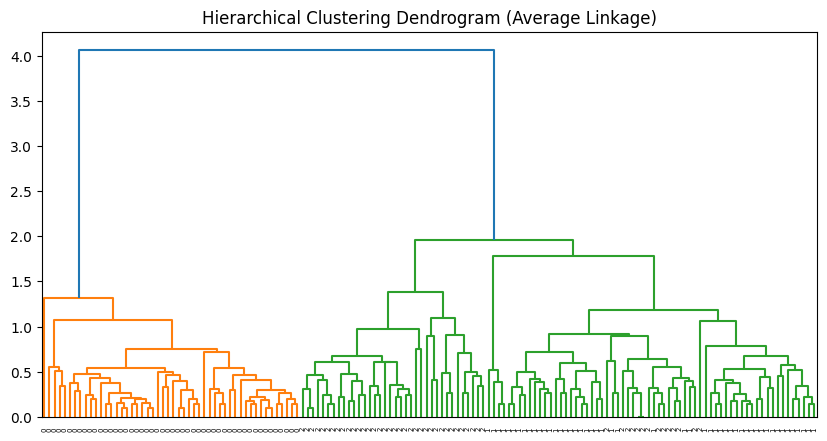

In [10]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X_iris = iris.data
linked = linkage(X_iris, method='average')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


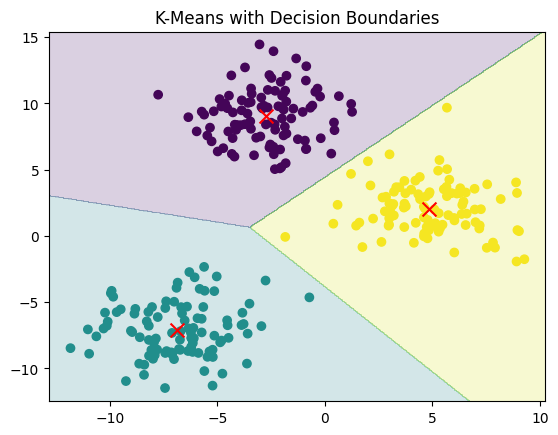

In [11]:
# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X_overlap, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans_overlap = KMeans(n_clusters=3, random_state=42)
labels_overlap = kmeans_overlap.fit_predict(X_overlap)

# Plot data points
plt.scatter(X_overlap[:,0], X_overlap[:,1], c=labels_overlap, cmap='viridis')

# Decision boundaries
x_min, x_max = X_overlap[:, 0].min() - 1, X_overlap[:, 0].max() + 1
y_min, y_max = X_overlap[:, 1].min() - 1, X_overlap[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans_overlap.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

plt.scatter(kmeans_overlap.cluster_centers_[:,0], kmeans_overlap.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.title("K-Means with Decision Boundaries")
plt.show()


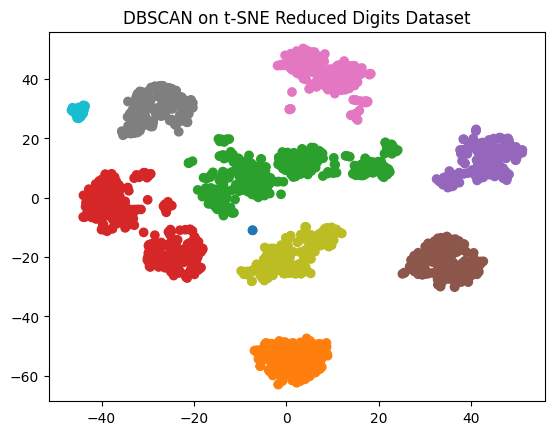

In [12]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X_digits = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_digits)

dbscan_tsne = DBSCAN(eps=6, min_samples=5)
labels_tsne = dbscan_tsne.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_tsne, cmap='tab10')
plt.title("DBSCAN on t-SNE Reduced Digits Dataset")
plt.show()


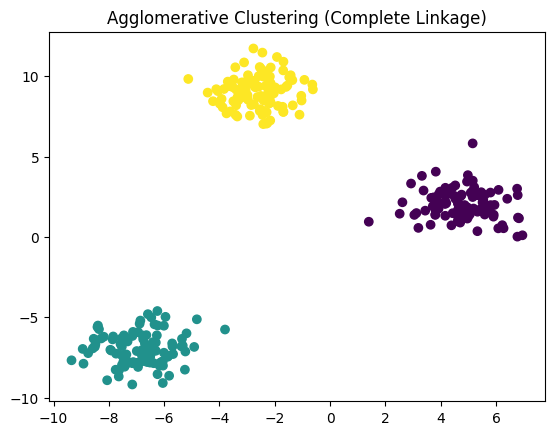

In [13]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X_blob, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_agg = agg_complete.fit_predict(X_blob)

plt.scatter(X_blob[:,0], X_blob[:,1], c=labels_agg, cmap='viridis')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


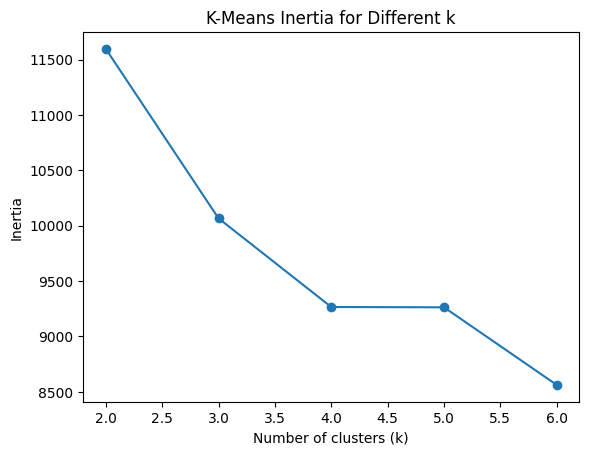

In [14]:
# 34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_cancer = StandardScaler().fit_transform(cancer.data)

inertia_values = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cancer)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2,7), inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for Different k")
plt.show()


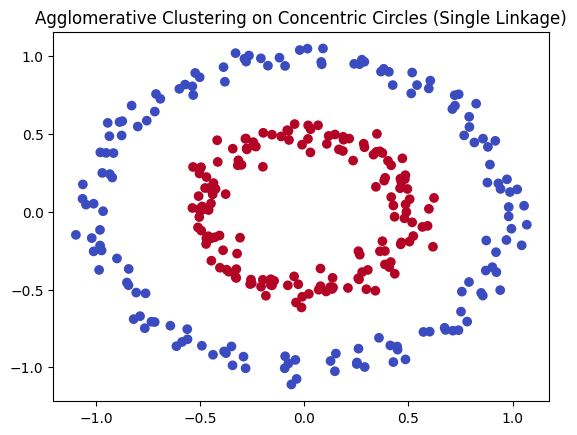

In [15]:
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
labels_circles = agg_single.fit_predict(X_circles)

plt.scatter(X_circles[:,0], X_circles[:,1], c=labels_circles, cmap='coolwarm')
plt.title("Agglomerative Clustering on Concentric Circles (Single Linkage)")
plt.show()


In [16]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)

dbscan_wine = DBSCAN(eps=1.5, min_samples=5)
labels_wine = dbscan_wine.fit_predict(X_wine)

n_clusters = len(set(labels_wine)) - (1 if -1 in labels_wine else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


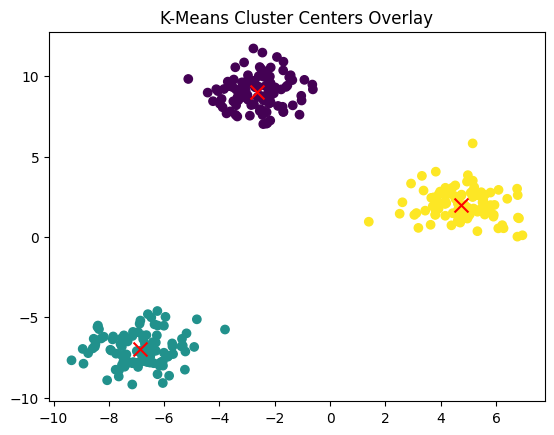

In [17]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_blobs, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans_blobs = KMeans(n_clusters=3, random_state=42)
labels_blobs = kmeans_blobs.fit_predict(X_blobs)

plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels_blobs, cmap='viridis')
plt.scatter(kmeans_blobs.cluster_centers_[:,0], kmeans_blobs.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.title("K-Means Cluster Centers Overlay")
plt.show()


In [18]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X_iris = iris.data

dbscan_iris = DBSCAN(eps=0.6, min_samples=5)
labels_db = dbscan_iris.fit_predict(X_iris)

n_noise = np.sum(labels_db == -1)
print("Number of samples identified as noise:", n_noise)


Number of samples identified as noise: 9


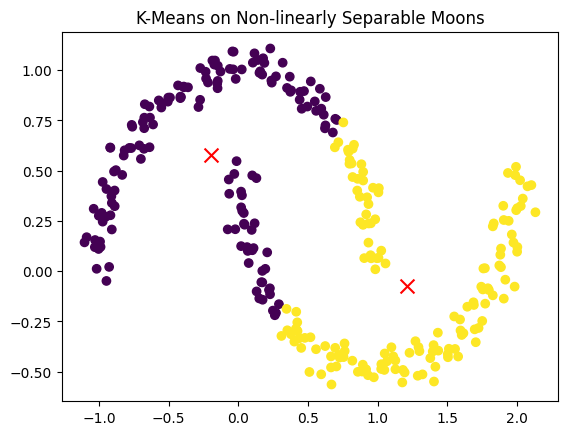

In [19]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_moons = kmeans_moons.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=labels_moons, cmap='viridis')
plt.scatter(kmeans_moons.cluster_centers_[:,0], kmeans_moons.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.title("K-Means on Non-linearly Separable Moons")
plt.show()


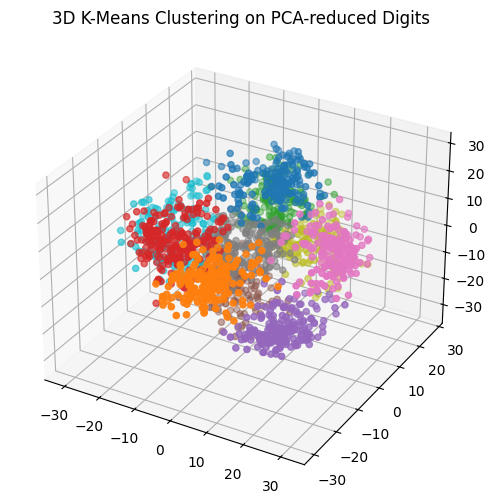

In [20]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X_digits = digits.data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_digits)

kmeans_digits3d = KMeans(n_clusters=10, random_state=42)
labels_digits3d = kmeans_digits3d.fit_predict(X_pca)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels_digits3d, cmap='tab10')
ax.set_title("3D K-Means Clustering on PCA-reduced Digits")
plt.show()
